In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [3]:
data_train = pd.read_csv('C:\\Users\\Nimisha Jain\\Downloads\\train.csv')
data_test = pd.read_csv('C:\\Users\\Nimisha Jain\\Downloads\\test.csv')
train_copy = data_train
test_copy = data_test

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

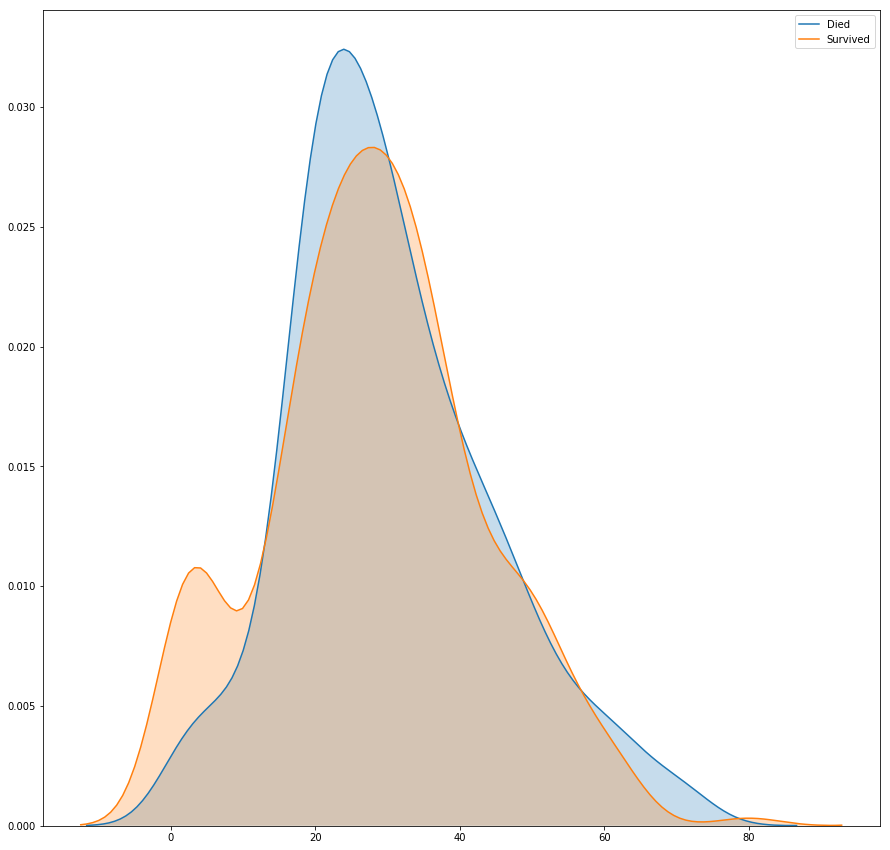

In [9]:
plt.figure(figsize=(15,15))
sns.kdeplot(data_train['Age'][data_train.Survived==0],shade=True)
sns.kdeplot(data_train['Age'][data_train.Survived==1],shade=True)
plt.legend(['Died','Survived'])

import warnings
warnings.filterwarnings('ignore')

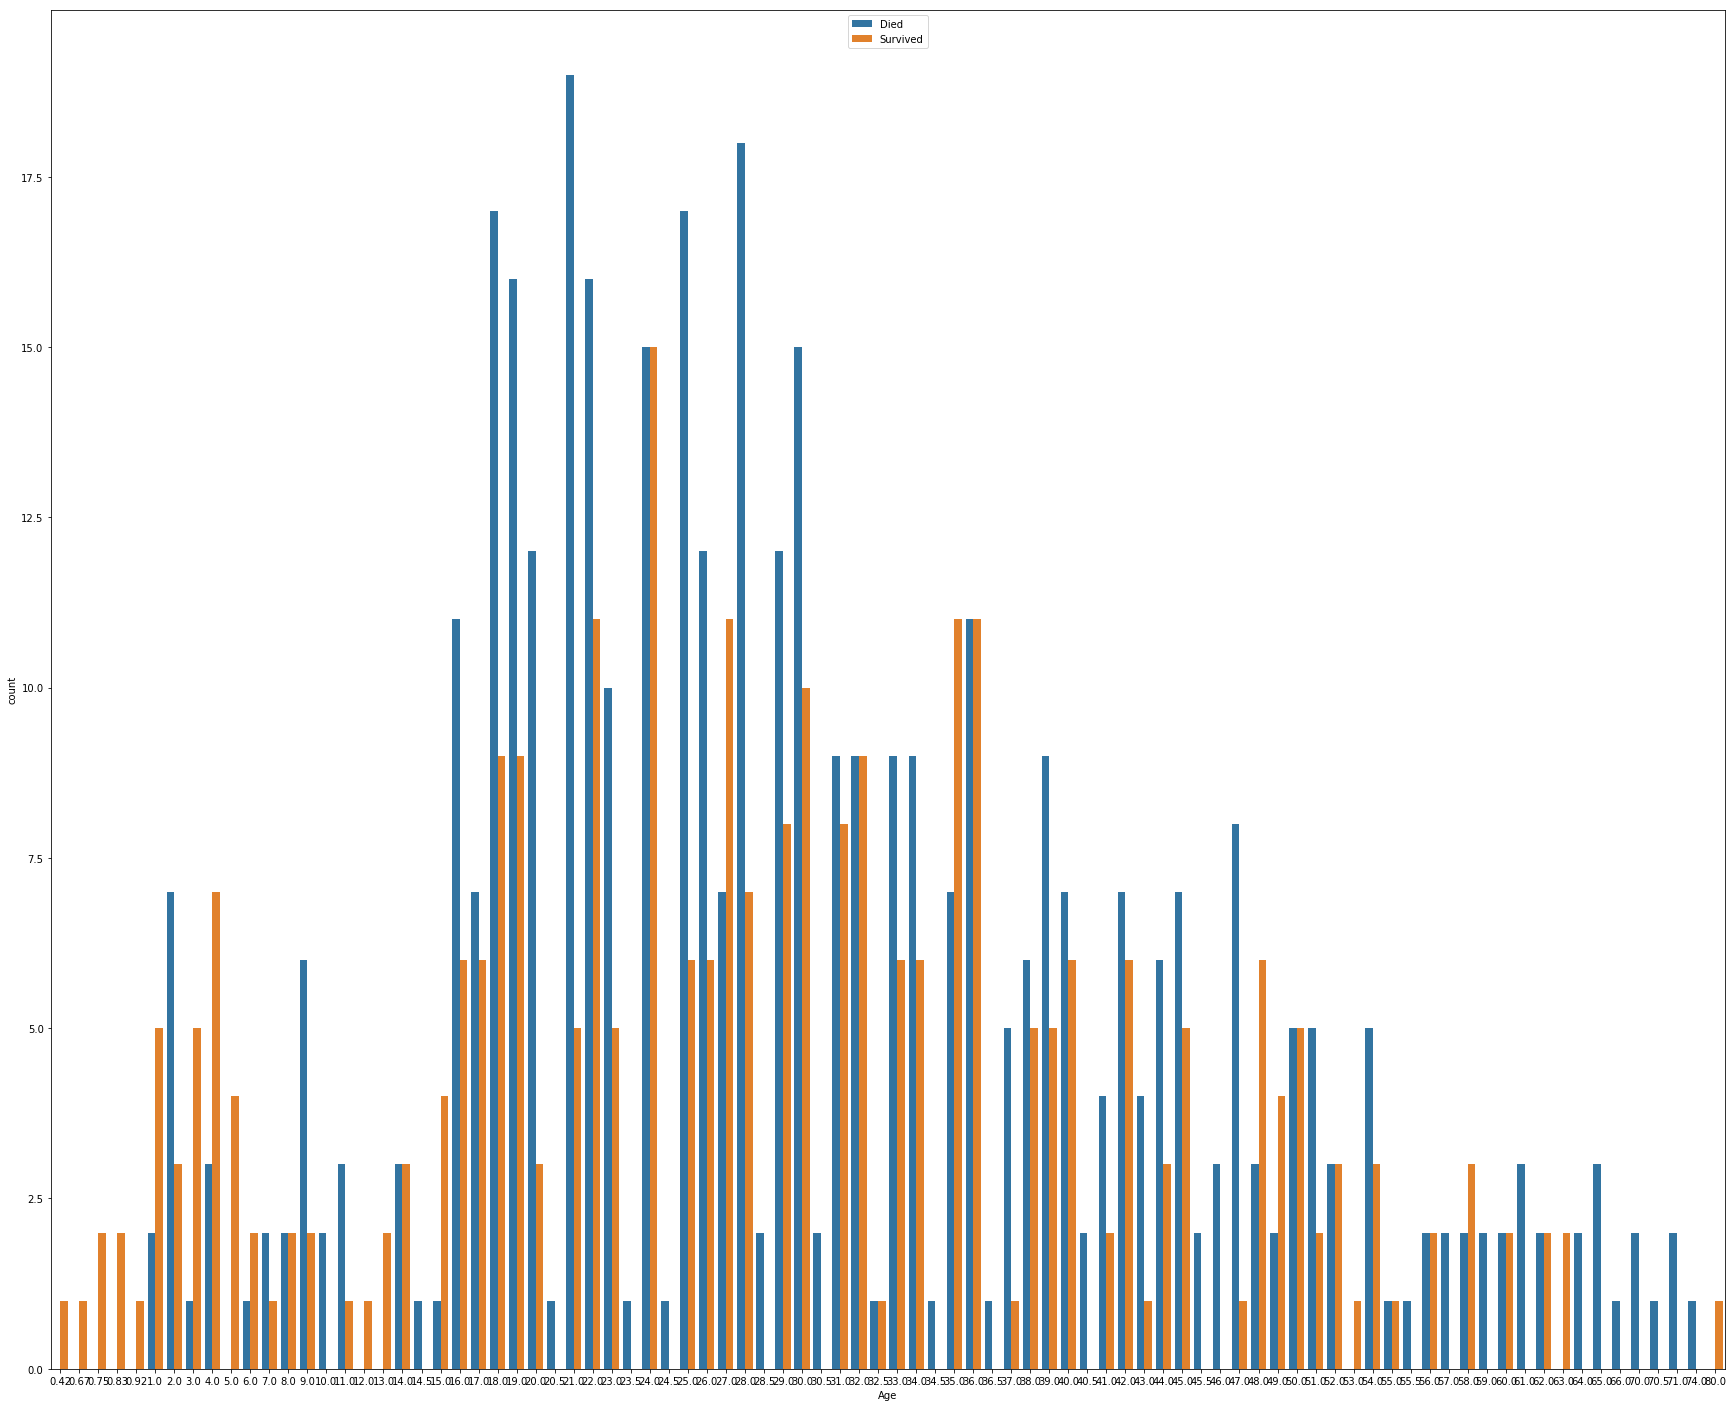

In [10]:
plt.figure(figsize=(30,25))
sns.countplot(data=data_train,x='Age',hue='Survived')
plt.legend(['Died','Survived'])

In [11]:
median_age = data_train['Age'].median()
median_age

28.0

In [12]:
data_train['Age']=data_train['Age'].fillna(-1)
b = [-2,0,12,18,30,50,np.inf]
labels = ['U','I','T','Y','A','O']
data_train['Age']=pd.cut(data_train['Age'],b,labels=labels)

In [13]:
data_test['Age']=data_test['Age'].fillna(-1)
bt = [-2,0,12,18,30,50,np.inf]
labelst = ['U','I','T','Y','A','O']
data_test['Age']=pd.cut(data_test['Age'],bt,labels=labelst)

In [14]:
data_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Y,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,A,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Y,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,A,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,A,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,U,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,O,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,I,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Y,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,T,1,0,237736,30.0708,NaN,C


In [15]:
#median_age_test = data_test['Age'].median()
#median_age_test

In [16]:
#data_test['Age']=data_test['Age'].fillna(-1)
#data_test['Age'] = data_test['Age'].astype(int)

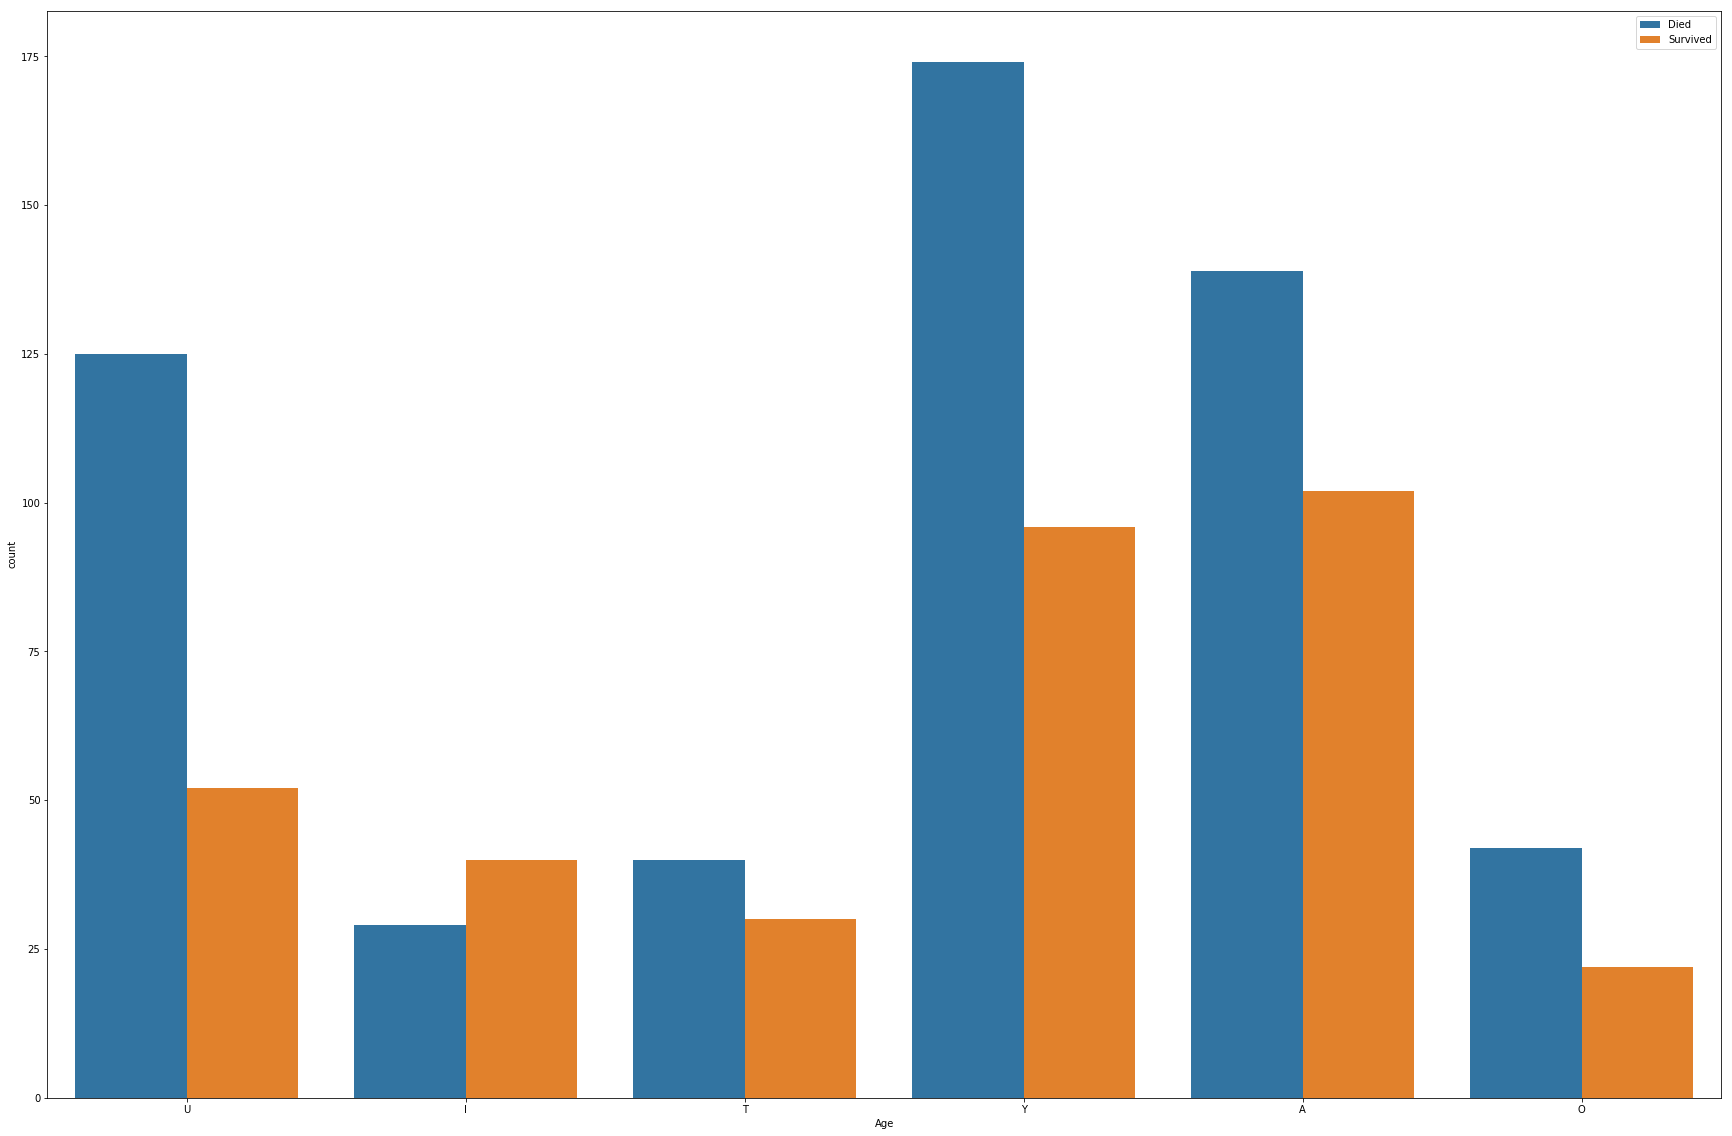

In [17]:
plt.figure(figsize=(30,20))
sns.countplot(data=data_train,x='Age',hue='Survived')
plt.legend(['Died','Survived'])

In [18]:
#data_test['Fare']=data_test['Fare'].fillna(int(median_fare))
#data_test['Fare']=data_test['Fare'].astype(int)

In [19]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

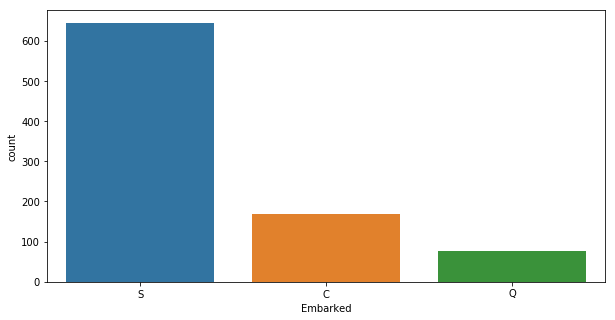

In [20]:
plt.figure(figsize=(10,5))
plot= sns.countplot(data=data_train,x='Embarked')

In [21]:
data_train['Embarked'] = data_train['Embarked'].fillna('S')

In [22]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
data_test['Fare']=data_test['Fare'].fillna(int(data_test['Fare'].median()))

In [24]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [25]:
data_train = data_train.drop(columns=['Name','PassengerId','Ticket','Cabin'])
data_test = data_test.drop(columns=['Name','PassengerId','Ticket','Cabin'])

In [26]:
data_train['Family'] = data_train['SibSp'] + data_train['Parch']
data_test['Family'] = data_test['SibSp'] + data_test['Parch']

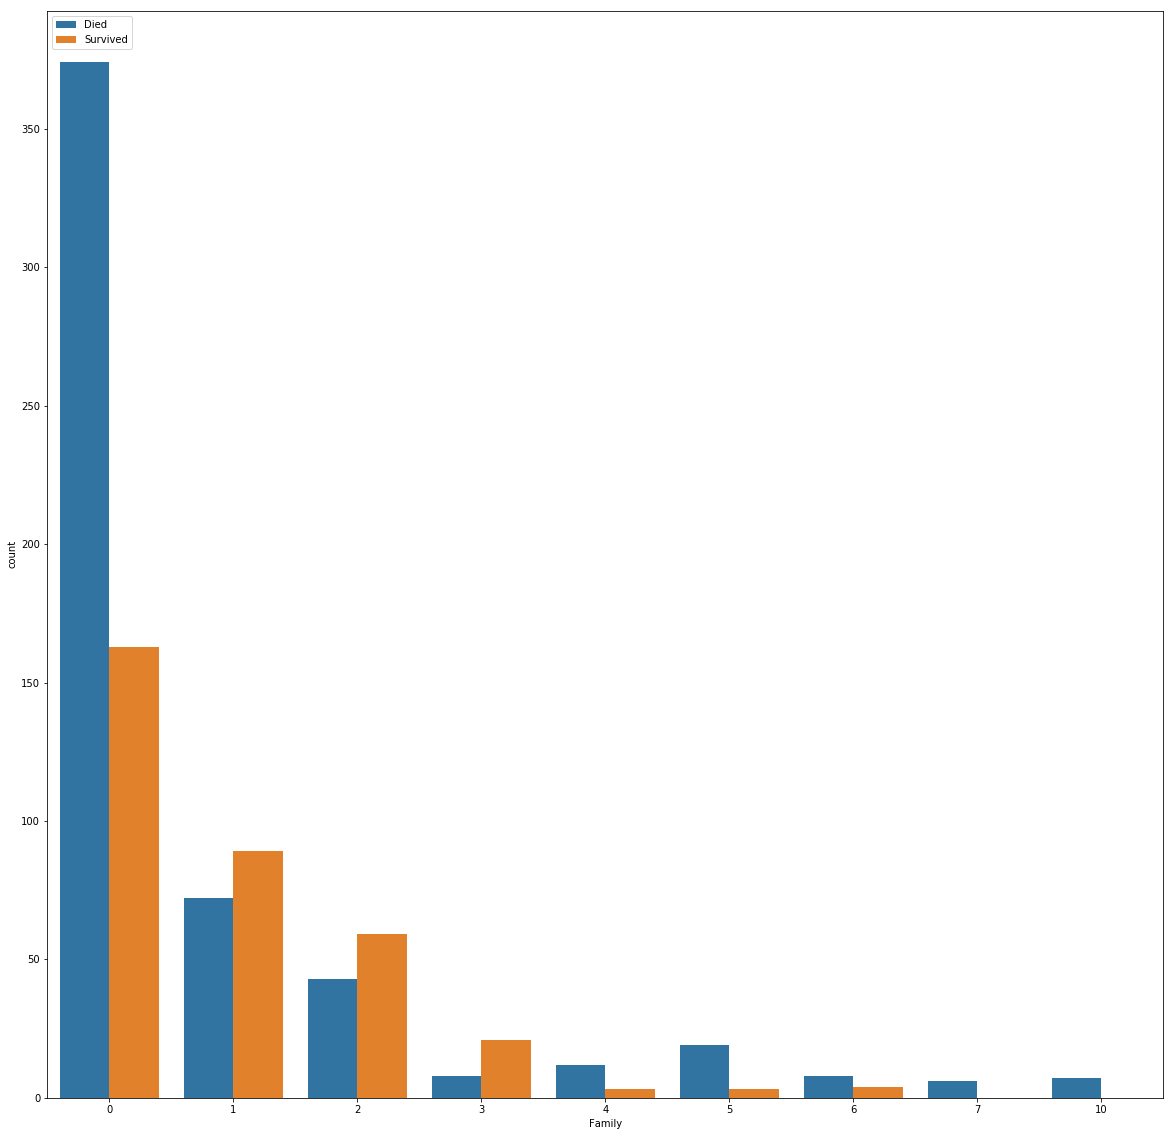

In [27]:
plt.figure(figsize=(20,20))
sns.countplot(data= data_train, x = 'Family',hue='Survived')
plt.legend(['Died','Survived'])

In [28]:
data_train.loc[data_train['Family']!= 0, 'o_fam'] = 1
data_train.loc[data_train['Family']== 0, 'o_fam'] = 0
data_train['o_fam'] = data_train['o_fam'].astype(int)

In [29]:
data_test.loc[data_test['Family']!= 0, 'o_fam'] = 1
data_test.loc[data_test['Family']== 0, 'o_fam'] = 0
data_test['o_fam'] = data_test['o_fam'].astype(int)

In [30]:
data_train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,o_fam
0,0,3,male,Y,1,0,7.2500,S,1,1
1,1,1,female,A,1,0,71.2833,C,1,1
2,1,3,female,Y,0,0,7.9250,S,0,0
3,1,1,female,A,1,0,53.1000,S,1,1
4,0,3,male,A,0,0,8.0500,S,0,0
5,0,3,male,U,0,0,8.4583,Q,0,0
6,0,1,male,O,0,0,51.8625,S,0,0
7,0,3,male,I,3,1,21.0750,S,4,1
8,1,3,female,Y,0,2,11.1333,S,2,1
9,1,2,female,T,1,0,30.0708,C,1,1


In [31]:
data_test.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,o_fam
0,3,male,A,0,0,7.8292,Q,0,0
1,3,female,A,1,0,7.0000,S,1,1
2,2,male,O,0,0,9.6875,Q,0,0
3,3,male,Y,0,0,8.6625,S,0,0
4,3,female,Y,1,1,12.2875,S,2,1
5,3,male,T,0,0,9.2250,S,0,0
6,3,female,Y,0,0,7.6292,Q,0,0
7,2,male,Y,1,1,29.0000,S,2,1
8,3,female,T,0,0,7.2292,C,0,0
9,3,male,Y,2,0,24.1500,S,2,1


<Figure size 1440x1080 with 0 Axes>

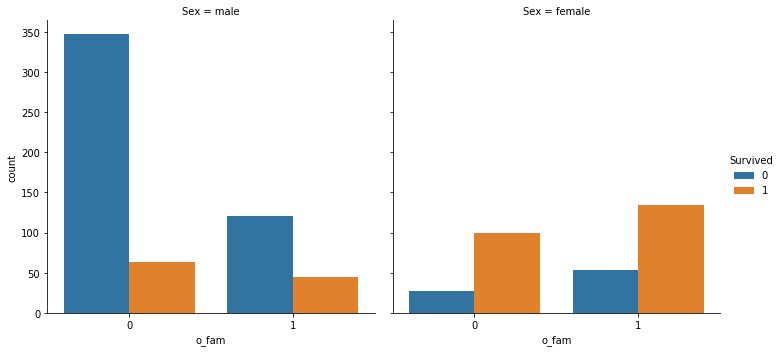

In [32]:
plt.figure(figsize=(20,15))
g = sns.catplot(x="o_fam", hue="Survived", col="Sex", data=data_train, kind="count", height=5, aspect=1)
plt.show()

In [33]:
data_train = pd.get_dummies(data_train,columns=['Sex','Embarked','Age'])
data_test = pd.get_dummies(data_test,columns=['Sex','Embarked','Age'])

In [34]:
data_train.head()

,Survived,Pclass,SibSp,Parch,Fare,Family,o_fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_U,Age_I,Age_T,Age_Y,Age_A,Age_O
0,0,3,1,0,7.2500,1,1,0,1,0,0,1,0,0,0,1,0,0
1,1,1,1,0,71.2833,1,1,1,0,1,0,0,0,0,0,0,1,0
2,1,3,0,0,7.9250,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1,1,1,0,53.1000,1,1,1,0,0,0,1,0,0,0,0,1,0
4,0,3,0,0,8.0500,0,0,0,1,0,0,1,0,0,0,0,1,0


In [35]:
data_test.head()

,Pclass,SibSp,Parch,Fare,Family,o_fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_U,Age_I,Age_T,Age_Y,Age_A,Age_O
0,3,0,0,7.8292,0,0,0,1,0,1,0,0,0,0,0,1,0
1,3,1,0,7.0000,1,1,1,0,0,0,1,0,0,0,0,1,0
2,2,0,0,9.6875,0,0,0,1,0,1,0,0,0,0,0,0,1
3,3,0,0,8.6625,0,0,0,1,0,0,1,0,0,0,1,0,0
4,3,1,1,12.2875,2,1,1,0,0,0,1,0,0,0,1,0,0


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train['Fare'] = scaler.fit_transform(data_train[['Fare']])

In [37]:
data_test['Fare'] = scaler.fit_transform(data_test[['Fare']])

In [38]:
data_train.head()

,Survived,Pclass,SibSp,Parch,Fare,Family,o_fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_U,Age_I,Age_T,Age_Y,Age_A,Age_O
0,0,3,1,0,-0.502445,1,1,0,1,0,0,1,0,0,0,1,0,0
1,1,1,1,0,0.786845,1,1,1,0,1,0,0,0,0,0,0,1,0
2,1,3,0,0,-0.488854,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1,1,1,0,0.420730,1,1,1,0,0,0,1,0,0,0,0,1,0
4,0,3,0,0,-0.486337,0,0,0,1,0,0,1,0,0,0,0,1,0


In [39]:
data_test.head()

,Pclass,SibSp,Parch,Fare,Family,o_fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_U,Age_I,Age_T,Age_Y,Age_A,Age_O
0,3,0,0,-0.497390,0,0,0,1,0,1,0,0,0,0,0,1,0
1,3,1,0,-0.512255,1,1,1,0,0,0,1,0,0,0,0,1,0
2,2,0,0,-0.464078,0,0,0,1,0,1,0,0,0,0,0,0,1
3,3,0,0,-0.482452,0,0,0,1,0,0,1,0,0,0,1,0,0
4,3,1,1,-0.417469,2,1,1,0,0,0,1,0,0,0,1,0,0


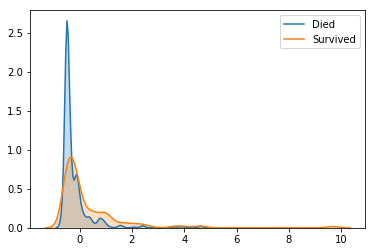

In [40]:
sns.kdeplot(data_train['Fare'][data_train.Survived==0],shade=True)
sns.kdeplot(data_train['Fare'][data_train.Survived==1],shade=True)
plt.legend(['Died','Survived'])

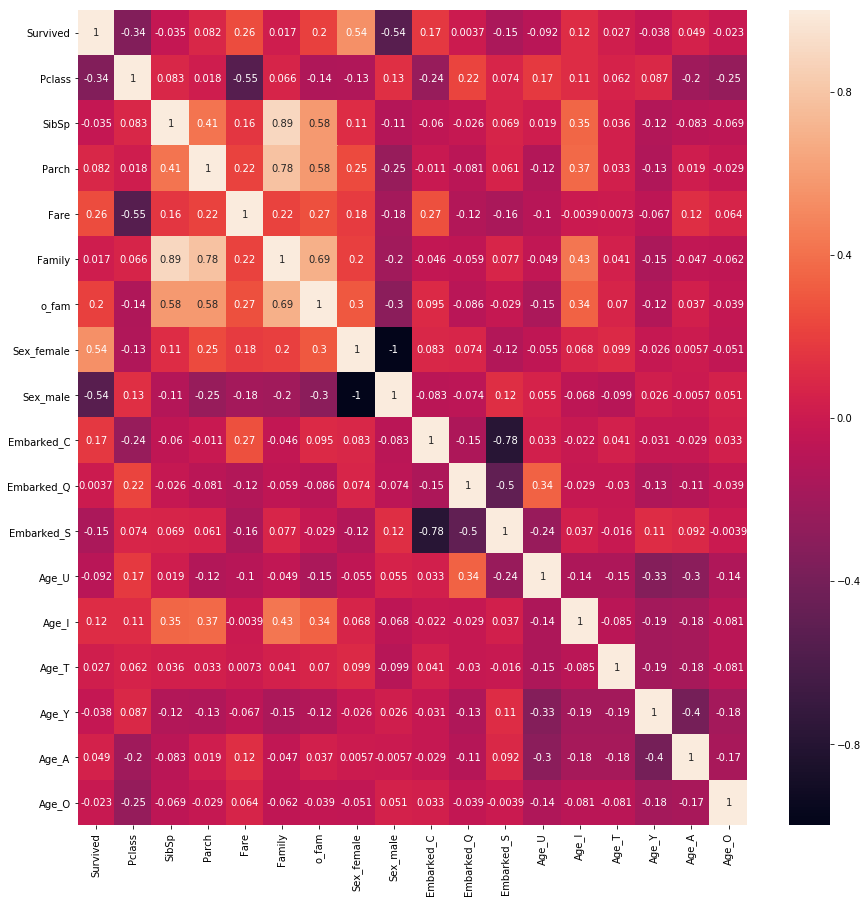

In [41]:
plt.figure(figsize=(15,15))
plot = sns.heatmap(data_train.corr(),annot=True)

In [43]:
data_train = data_train.drop(columns=['SibSp','Parch','Family'])

In [42]:
data_test = data_test.drop(columns=['SibSp','Parch','Family'])

In [44]:
data_train.head()

,Survived,Pclass,Fare,o_fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_U,Age_I,Age_T,Age_Y,Age_A,Age_O
0,0,3,-0.502445,1,0,1,0,0,1,0,0,0,1,0,0
1,1,1,0.786845,1,1,0,1,0,0,0,0,0,0,1,0
2,1,3,-0.488854,0,1,0,0,0,1,0,0,0,1,0,0
3,1,1,0.420730,1,1,0,0,0,1,0,0,0,0,1,0
4,0,3,-0.486337,0,0,1,0,0,1,0,0,0,0,1,0


In [45]:
#converting test data
data_test.head()

,Pclass,Fare,o_fam,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_U,Age_I,Age_T,Age_Y,Age_A,Age_O
0,3,-0.497390,0,0,1,0,1,0,0,0,0,0,1,0
1,3,-0.512255,1,1,0,0,0,1,0,0,0,0,1,0
2,2,-0.464078,0,0,1,0,1,0,0,0,0,0,0,1
3,3,-0.482452,0,0,1,0,0,1,0,0,0,1,0,0
4,3,-0.417469,1,1,0,0,0,1,0,0,0,1,0,0


In [46]:
X = data_train.drop('Survived',axis=1)
y = data_train['Survived']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [54]:
lr = LogisticRegression(max_iter=10)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
predict = lr.predict(X_test)

In [58]:
lr.score(X_train,y_train)

0.8154093097913323

In [59]:
lr.score(X_test,y_test)

0.7723880597014925

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       153
           1       0.78      0.66      0.71       115

   micro avg       0.77      0.77      0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [254]:
from sklearn import model_selection
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=10, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [255]:
predrf=rf.predict(X_test)

In [256]:
rf.score(X_train,y_train)

0.9454253611556982

In [257]:
rf.score(X_test,y_test)

0.7873134328358209

In [122]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.81      0.65      0.72       115

   micro avg       0.78      0.78      0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



In [133]:
svm = SVC(gamma='auto',C=1)
svm.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
predsvm=svm.predict(X_test)

In [135]:
svm.score(X_train,y_train)

0.8025682182985554

In [136]:
svm.score(X_test,y_test)

0.7574626865671642

In [137]:
print(classification_report(y_test,predsvm))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       153
           1       0.76      0.64      0.69       115

   micro avg       0.76      0.76      0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268



In [168]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=6, min_samples_split=2)

In [169]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [184]:
preddtc = dtc.predict(X_test)

In [185]:
dtc.score(X_train,y_train)

0.8908507223113965

In [186]:
dtc.score(X_test,y_test)

0.7985074626865671

In [187]:
print(classification_report(y_test, preddtc))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       153
           1       0.87      0.63      0.73       115

   micro avg       0.80      0.80      0.80       268
   macro avg       0.82      0.78      0.78       268
weighted avg       0.81      0.80      0.79       268



In [258]:
pred = rf.predict(data_test)

In [259]:
Data_submit= test_copy[['PassengerId']]

Data_submit = pd.concat([Data_submit,pd.DataFrame(pred,columns=['Survived'])],axis=1)

Data_submit.to_csv('C:/Users/Nimisha Jain/Downloads/Submit.csv', index=False)

(418, 11)